In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Read csv file

mall = pd.read_csv("Mall_Customers.csv")
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
new_mall = np.array(mall)
new_mall[:5, :]

array([[1, 'Male', 19, 15, 39],
       [2, 'Male', 21, 15, 81],
       [3, 'Female', 20, 16, 6],
       [4, 'Female', 23, 16, 77],
       [5, 'Female', 31, 17, 40]], dtype=object)

In [4]:
#200 customers with a mean age of 38.85 with an annual income of $60,000
#Mean spending score is 50

print(mall.dtypes)
print(mall.describe())

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [5]:
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

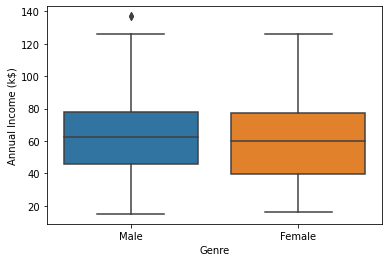

In [6]:
#Checking for outliers
sns.boxplot(x = mall["Genre"],y = mall["Annual Income (k$)"])
plt.show()

In [7]:
#Which Customer has the lowest Spending Score?
mall.iloc[mall["Spending Score (1-100)"].idxmin()]

CustomerID                 157
Genre                     Male
Age                         37
Annual Income (k$)          78
Spending Score (1-100)       1
Name: 156, dtype: object

In [8]:
#Are there other customers who have the same lowest spending score?
mall[mall["Spending Score (1-100)"] == 1]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
156,157,Male,37,78,1
158,159,Male,34,78,1


In [9]:
#How about highest Spending Score?
mall.iloc[mall["Spending Score (1-100)"].idxmax()]

CustomerID                    12
Genre                     Female
Age                           35
Annual Income (k$)            19
Spending Score (1-100)        99
Name: 11, dtype: object

In [10]:
#Are there other customers who have the same highest spending score?
mall[mall["Spending Score (1-100)"] == 99]

#No, doesn't look like it

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
11,12,Female,35,19,99


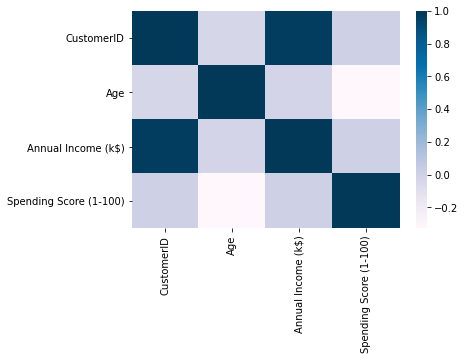

In [25]:
#Is there any correlation? Most likely not.
mall_corr = mall.corr(method='pearson')
sns.heatmap(mall_corr, cmap='PuBu')
plt.show()

In [ ]:
#Check how many males and females
pd.value_counts(mall.Genre)

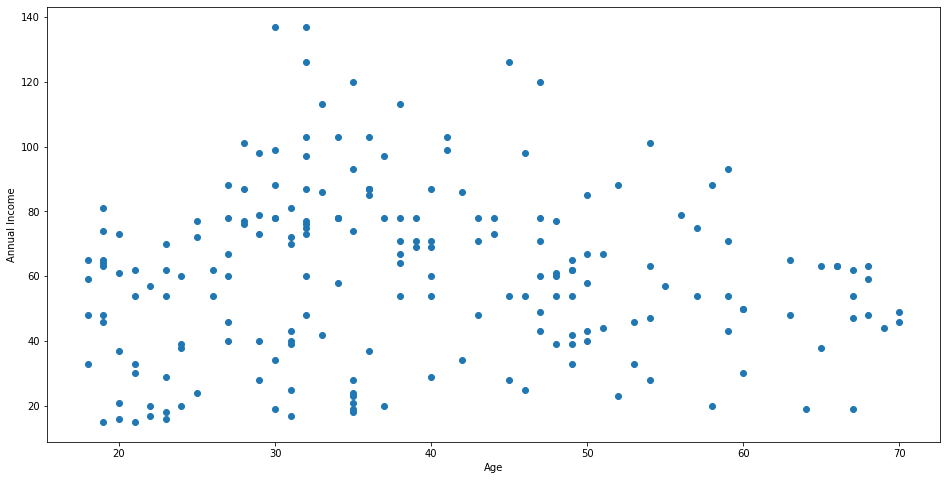

In [13]:
#Scatterplot of Age vs Annual Income
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(mall["Age"], mall["Annual Income (k$)"])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
plt.show()

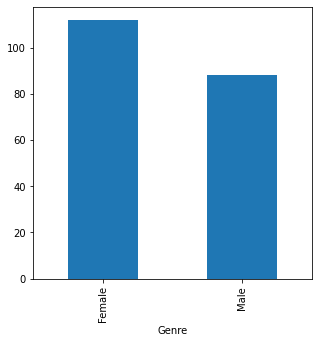

In [14]:
#Frequency bar of Male and Female

fig, ax = plt.subplots(figsize=(5,5))
mall.value_counts(mall["Genre"]).plot(kind='bar')
plt.show()

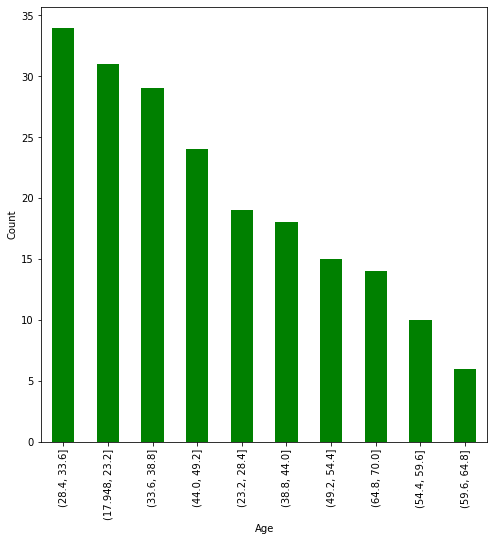

In [15]:
#Bar plot of Age in Bins
age = pd.cut(mall['Age'], 10)

fig, ax = plt.subplots(figsize=(8,8))
mall.value_counts(age).plot(kind='bar', color='green')
ax.set_ylabel('Count')
plt.show()

